The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3200000.0


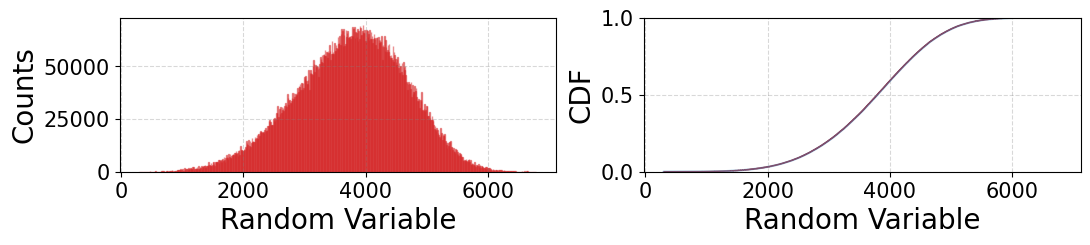

net.graph endpoint types: <class 'str'>


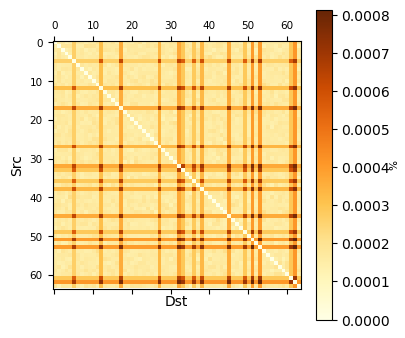

In [5]:
%load_ext autoreload
%autoreload

# %matplotlib ipympl

from trafpy.generator import Demand, DemandPlotter
import trafpy.generator as tpg
import time
import copy
from scipy.io import savemat

##################### SEED #############################
import numpy as np
import random
from trafpy.utils import seed_stochastic_modules_globally
seed = 0
seed_stochastic_modules_globally(default_seed=0,
                                 numpy_module=np,
                                 random_module=random)
########################################################


sid = 1
# set vars
X = 1
N = 64*X
# path = r'Y:/Joshua/Traffic/'
path = 'Y:/Joshua/Traffic/'
endpoints = [str(i) for i in range(N)]

min_num_demands = 100
min_last_demand_arrival_time = 250
# loads = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
loads = [0.9]
# jensen_shannon_distance_threshold = 0.3
jensen_shannon_distance_threshold = 0.2
# jensen_shannon_distance_threshold = 0.1
NUM_DEMANDS_FACTOR = 5

sk_nd = [0, 0.25,0.5,0.75, 0.5625,0.8125,0.3125, 0.5625,0.8125]
sk_pr = [1, 0.64,0.64,0.64,0.16,0.16,0.32,0.32,0.32]

SN = sk_nd[sid-1]
SK = sk_pr[sid-1]
# num_skewed_nodes=int(len(endpoints)*SN)

# init network
net = tpg.gen_arbitrary_network(ep_label=None, num_eps=N, ep_capacity=100000)
print(net.graph['max_nw_capacity'])

# set any distributions you want to keep constant for all sets
flow_size_dist, _ = tpg.gen_named_val_dist(dist='weibull',
                                        params={'_alpha': 4.8, '_lambda': 4100},
                                        return_data=False,
                                        show_fig=True,
                                        round_to_nearest=1)

interarrival_time_dist = {0.125:1}

# node_dist = tpg.gen_uniform_node_dist(eps=net.graph['endpoints'],
#                                          show_fig=False)    

print(f'net.graph endpoint types: {type(net.graph["endpoints"][0])}')
# raise Exception()
node_dist, _ = tpg.gen_multimodal_node_dist(eps=net.graph['endpoints'],
                                         skewed_nodes=[],
                                         skewed_node_probs=[SK/(SN*N) for _ in range(int(SN*N))],
                                         # show_fig=False,
                                         show_fig=True,
                                         plot_chord=False,
                                         num_skewed_nodes=int(SN*N))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Generating load 0.9...


Duplicating demands:  18%|█▊        | 50598/274530 [00:00<00:00, 505973.24it/s]

Packed 18302 flows in 5.329049348831177 s.


Duplicated from 18302 to 292832 total demands (4 duplication(s)) in 0.8935635089874268 s.


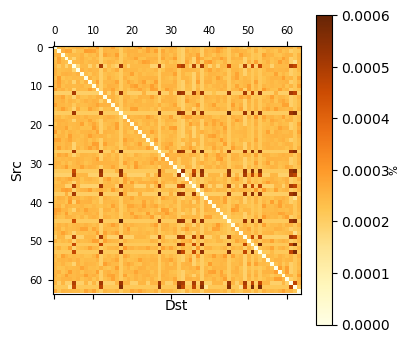

<Figure size 640x480 with 0 Axes>

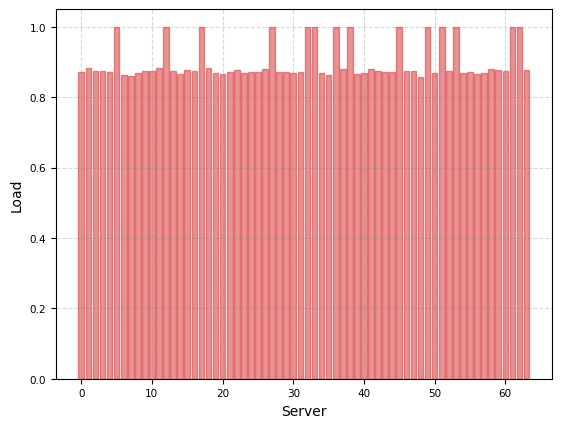

<Figure size 640x480 with 0 Axes>

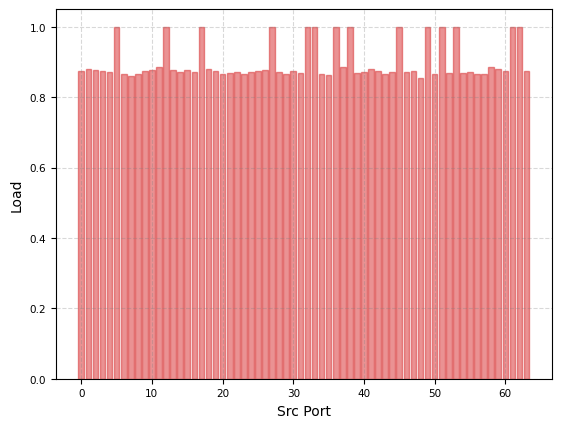

<Figure size 640x480 with 0 Axes>

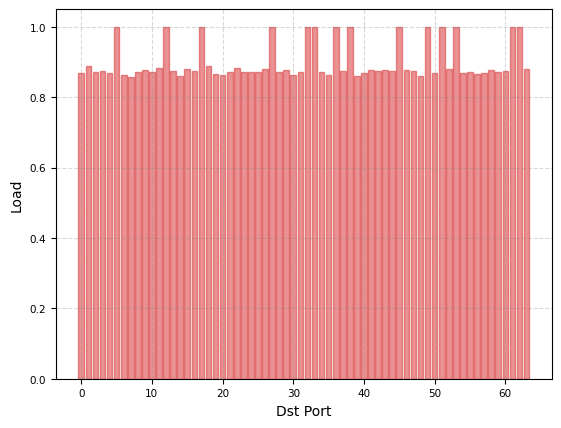

Generated load 0.9 in 54.426817655563354 seconds.


In [6]:
%load_ext autoreload
%autoreload


for load in loads:
    print('Generating load {}...'.format(load))
    
    start = time.time()
    
    network_load_config = {'network_rate_capacity': net.graph['max_nw_capacity'], 
                           'ep_link_capacity': net.graph['ep_link_capacity'],
                           'target_load_fraction': load}
    flow_centric_demand_data = tpg.create_demand_data(eps=net.graph['endpoints'],
                                                      node_dist=node_dist,
                                                      flow_size_dist=flow_size_dist,
                                                      interarrival_time_dist=interarrival_time_dist,
                                                      network_load_config=network_load_config,
                                                      jensen_shannon_distance_threshold=jensen_shannon_distance_threshold,
                                                      min_num_demands=min_num_demands,
                                                      min_last_demand_arrival_time=min_last_demand_arrival_time,
                                                      check_dont_exceed_one_ep_load=True,
                                                      auto_node_dist_correction=True,
                                                      print_data=True)

    demand = Demand(flow_centric_demand_data, net.graph['endpoints'])
    plotter = DemandPlotter(demand)
    plotter.plot_node_dist(eps=net.graph['endpoints'], plot_chord=False)
    plotter.plot_node_load_dists(eps=net.graph['endpoints'], ep_link_bandwidth=net.graph['ep_link_capacity'])
    
    # save generated demands
    # savemat("custom/uniform/load{}_N{}_matlab_matrix.mat".format(load, N), flow_centric_demand_data)
    
    end = time.time()
    print('Generated load {} in {} seconds.'.format(load, end-start))

In [7]:
print(end-start)

54.426817655563354
